# 拉格朗日插值法

一种多项式插值，多项式插值的多项式是唯一的

使用$n+1$个点构建最高项次数为$n$的多项式

拉格朗日插值基函数

$$

l_k(x)=\frac{(x-x_0)(x-x_1)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}

$$

插值基函数满足条件

$$

l_j(x_k) =
\begin{cases}
  1 &  k = j \\
  0 &  k \neq j
\end{cases}

\qquad j = 0,1,...n

$$

拉格朗日插值多项式$L_n(x)$为

$$

L_n(x)=\sum_{k=0}^{n} y_kl_k(x)

$$

令函数$w_{n+1}(x)$可以求出导数$w_{n+1}^{'}(x)$

$$

\begin{array}{c}

w_{n+1}(x)=(x-x_0)(x-x_1)...(x-x_n)\\

w_{n+1}^{'}(x_k)=(x_k-x_0)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)

\end{array}

$$

拉格朗日插值多项式可以写成

$$

L_n(x)=\sum_{k=0}^{n} y_k \frac{w_{n+1}(x)}{(x-x_k)w_{n+1}^{'}(x_k)}

$$


In [ ]:
def lagrange_interpolation(points: list[list[float]]):
    
    def p(x: float):

        res = 0

        for k, _ in enumerate(points):
            
            z1 = 1      # 分子
            z2 = 1      # 分母

            for j, _ in enumerate(points):
                if j != k:
                    z1 = z1 * (x - points[j][0])
                    z2 = z2 * (points[k][0] - points[j][0])

            res += ((z1 / z2) * points[k][1])

        return res

    return p



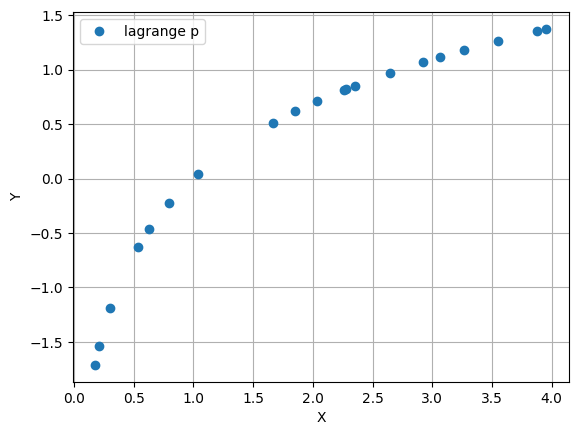

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 4, 20)
y = np.log(x)

# plt.plot(x, y, 'ro', label='y = log(x)', scalex=2, scaley=2)

points = [[float(xi), float(yi)] for xi, yi in zip(x, y)]

p = lagrange_interpolation(points)
p_f = np.vectorize(p)

y_1 = p_f(x)

plt.plot(x, y_1, 'o', label='lagrange p')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

